<a href="https://colab.research.google.com/github/1006udm/Mortality-and-Reasons-/blob/main/Mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("https://raw.githubusercontent.com/1006udm/Mortality-and-Reasons-/refs/heads/main/USRegionalMortality.csv")
head(df)

,rownames,Region,Status,Sex,Cause,Rate,SE
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,5,HHS Region 01,Urban,Male,Heart disease,188.2,1.0
2,6,HHS Region 01,Rural,Male,Heart disease,199.1,2.6
3,7,HHS Region 01,Urban,Female,Heart disease,115.1,0.6
4,8,HHS Region 01,Rural,Female,Heart disease,124.5,1.7
5,9,HHS Region 02,Urban,Male,Heart disease,226.8,0.8
6,10,HHS Region 02,Rural,Male,Heart disease,248.8,3.3


These datasets record mortality rates across all ages in the USA by cause of death, sex, and rural/urban status, 2011–2013. The dataset represents the rates for each administrative region under the Department of Health and Human Services (HHS).

HHS Region 01 - Boston: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

HHS Region 02 - New York: New Jersey, New York, Puerto Rico, and the Virgin Islands

HHS Region 03 - Philadelphia: Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, and West Virginia

HHS Region 04 - Atlanta: Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, and Tennessee

HHS Region 05 - Chicago: Illinois, Indiana, Michigan, Minnesota, Ohio, and Wisconsin

HHS Region 06 - Dallas: Arkansas, Louisiana, New Mexico, Oklahoma, and Texas

HHS Region 07 - Kansas City: Iowa, Kansas, Missouri, and Nebraska

HHS Region 08 - Denver: Colorado, Montana, North Dakota, South Dakota, Utah, and Wyoming

HHS Region 09 - San Francisco: Arizona, California, Hawaii, Nevada, American Samoa, Commonwealth of the Northern Mariana Islands, Federated States of Micronesia, Guam, Marshall Islands, and Republic of Palau

HHS Region 10 - Seattle: Alaska, Idaho, Oregon, and Washington

## **Data Cleaning**

1. Delete the unnecessary column (rownames)

In [3]:
install.packages("dplyr")
library(dplyr)

# Delete the first column: 'rownames'
df <- select(df, -rownames)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Region,Status,Sex,Cause,Rate,SE
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,HHS Region 01,Urban,Male,Heart disease,188.2,1.0
2,HHS Region 01,Rural,Male,Heart disease,199.1,2.6
3,HHS Region 01,Urban,Female,Heart disease,115.1,0.6
4,HHS Region 01,Rural,Female,Heart disease,124.5,1.7
5,HHS Region 02,Urban,Male,Heart disease,226.8,0.8
6,HHS Region 02,Rural,Male,Heart disease,248.8,3.3


**Status:** Urban or Rural

**Sex:** Male or Female

**Cause:** Heart Disease, Cancer, Lower Respiratory, Unintentional Injuries, Cerebrovascular Disease, Alzheimers, Diabetes, Flu and pneumonia, Suicide, and Nephritis.

**Death rate:** The death rate, or mortality rate, is calculated to understand the frequency of deaths in a specific population over a certain period, typically expressed per 100,000 people. Here’s how they find the death rate:

Identify the Number of Deaths: Determine the total number of deaths in the subpopulation for a specific cause of death within a given time frame.

Determine the Population Size: Identify the total population of the subpopulation being studied.

Calculate the Death Rate: Use the following formula to calculate the death rate:

$Death Rate = \frac{Number of Deaths}{Population}*100,000$

This formula gives the number of deaths per 100,000 people, allowing for standardized comparisons across different populations and regions.

**SE:** Standard error on Rate

Handle missing values:

In [4]:
# Count missing values in each column
colSums(is.na(df))

Region Status    Sex  Cause   Rate     SE 
     0      0      0      0      0      0

In [5]:
# Double check if there are any missing values in the data frame
anyNA(df)

[1] FALSE

## Explore the Data set

In [6]:
summary(df)

    Region             Status              Sex               Cause          
 Length:400         Length:400         Length:400         Length:400        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
      Rate              SE        
 Min.   :  3.40   Min.   :0.1000  
 1st Qu.: 18.07   1st Qu.:0.3000  
 Median : 29.20   Median :0.5000  
 Mean   : 56.91   Mean   :0.6408  
 3rd Qu.: 53.70   3rd Qu.:0.8000  
 Max.   :276.40   Max.   :3.3000  

In [7]:
str(df)

'data.frame':	400 obs. of  6 variables:
 $ Region: chr  "HHS Region 01" "HHS Region 01" "HHS Region 01" "HHS Region 01" ...
 $ Status: chr  "Urban" "Rural" "Urban" "Rural" ...
 $ Sex   : chr  "Male" "Male" "Female" "Female" ...
 $ Cause : chr  "Heart disease" "Heart disease" "Heart disease" "Heart disease" ...
 $ Rate  : num  188 199 115 124 227 ...
 $ SE    : num  1 2.6 0.6 1.7 0.8 3.3 0.5 2.3 0.8 2 ...


In [8]:
#Factor all the variables
Region <- factor(df$Region)
Rural_or_Urban <- factor(df$Status)
SE <- factor(df$SE)
Sex <- factor(df$Sex)
Cause <- factor(df$Cause)
Rates <- factor(df$Rate)

In [9]:
#Calculate how many people live in each region
people_by_region <- df %>%
group_by(Region) %>%
summarise(count = n())
# Print the result
print("Number of people living in each region:")
print(people_by_region)

[1] "Number of people living in each region:"
# A tibble: 10 × 2
   Region        count
   <chr>         <int>
 1 HHS Region 01    40
 2 HHS Region 02    40
 3 HHS Region 03    40
 4 HHS Region 04    40
 5 HHS Region 05    40
 6 HHS Region 06    40
 7 HHS Region 07    40
 8 HHS Region 08    40
 9 HHS Region 09    40
10 HHS Region 10    40


### Filtering and Summarizing Causes, and Box plots

**Filtering and Summarizing Heart Disease Data**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  106.0   136.6   175.8   176.7   214.2   276.4 

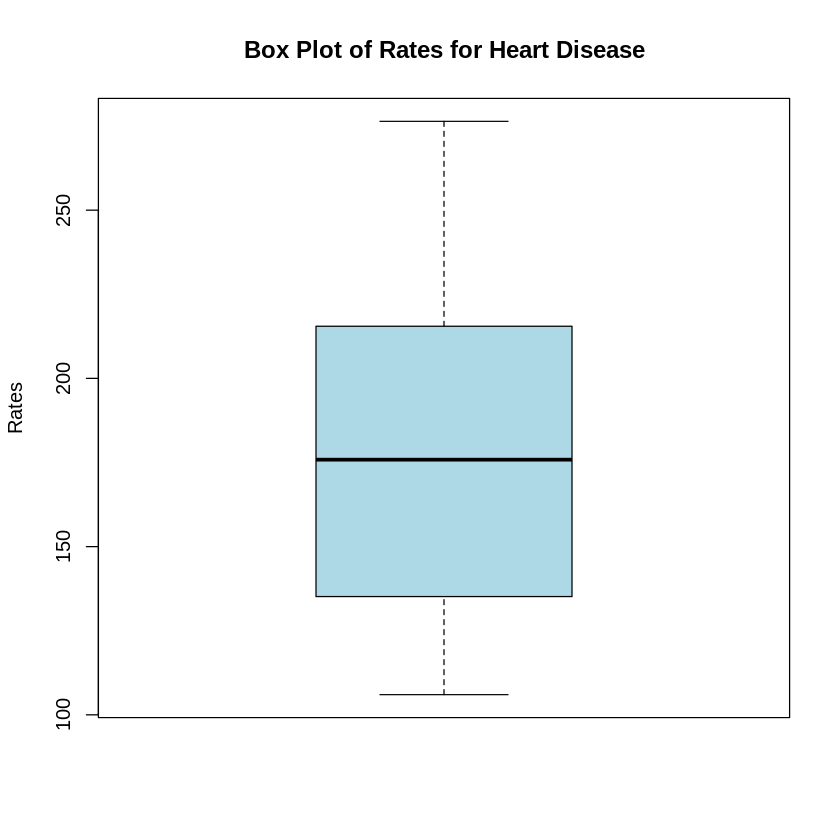

In [10]:
# Get index numbers where Cause is "Heart Disease"
heart_disease_indices <- which(df$Cause == "Heart disease")
index <- heart_disease_indices
# Get the data from the "Rates" column at the specified index
heart_disease_rate_value <- df$Rate[index]
summary(heart_disease_rate_value)

# Filter the data for Heart disease
heart_disease_rates <- df$Rate[df$Cause == "Heart disease"]
# Create the box plot
boxplot(heart_disease_rates,
main = "Box Plot of Rates for Heart Disease",
ylab = "Rates",
col = "lightblue")

**Filtering and Summarizing Cancer Data**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  122.5   144.5   161.8   172.5   203.1   245.2 

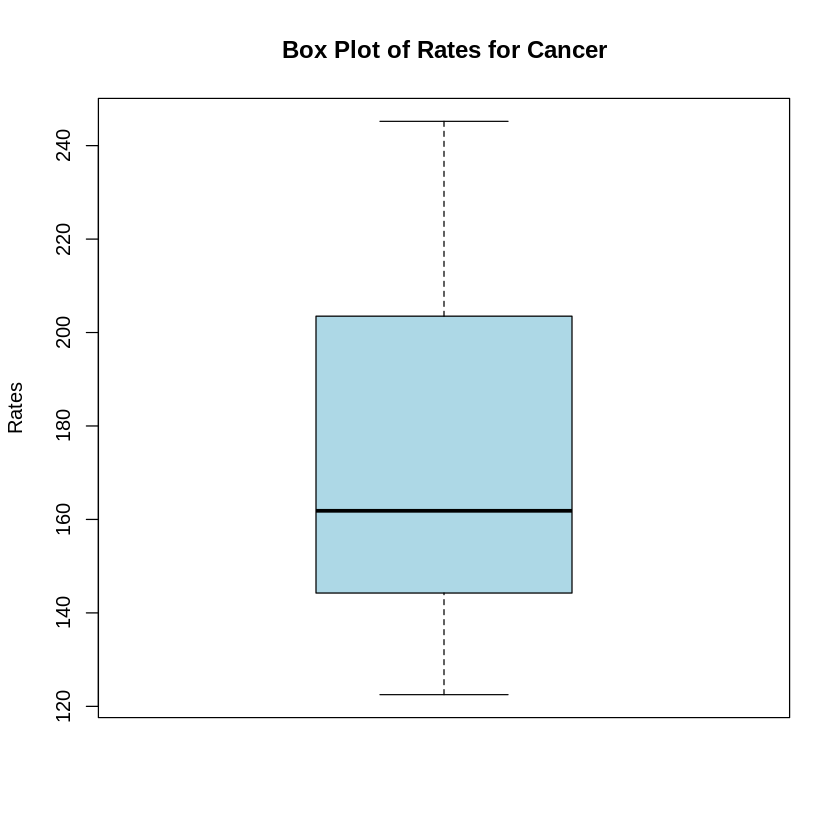

In [11]:
cancer_indices <- which(df$Cause == "Cancer")
index <- cancer_indices
cancer_rate_value <- df$Rate[index]
summary(cancer_rate_value)

boxplot(cancer_rate_value,
main = "Box Plot of Rates for Cancer",
ylab = "Rates",
col = "lightblue")

**Filtering and Summarizing Lower respiratory Data**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.00   40.05   45.95   46.63   51.25   70.70 

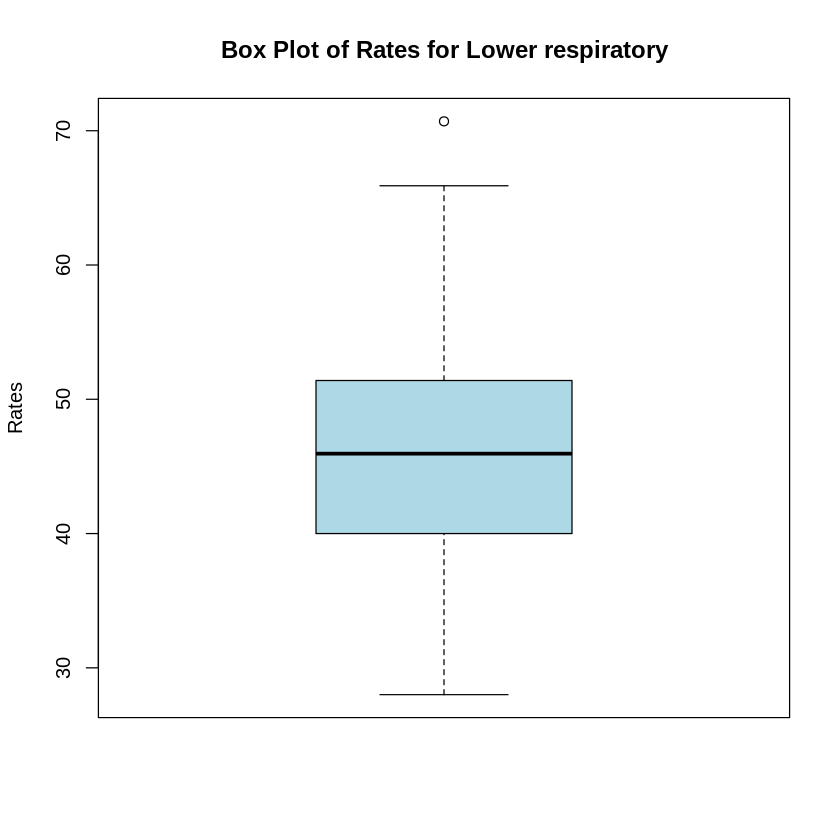

In [12]:
lower_respiratory_indices <- which(df$Cause == "Lower respiratory")
index <- lower_respiratory_indices
lower_respiratory_rate_value <- df$Rate[index]
summary(lower_respiratory_rate_value)

boxplot(lower_respiratory_rate_value,
main = "Box Plot of Rates for Lower respiratory",
ylab = "Rates",
col = "lightblue")

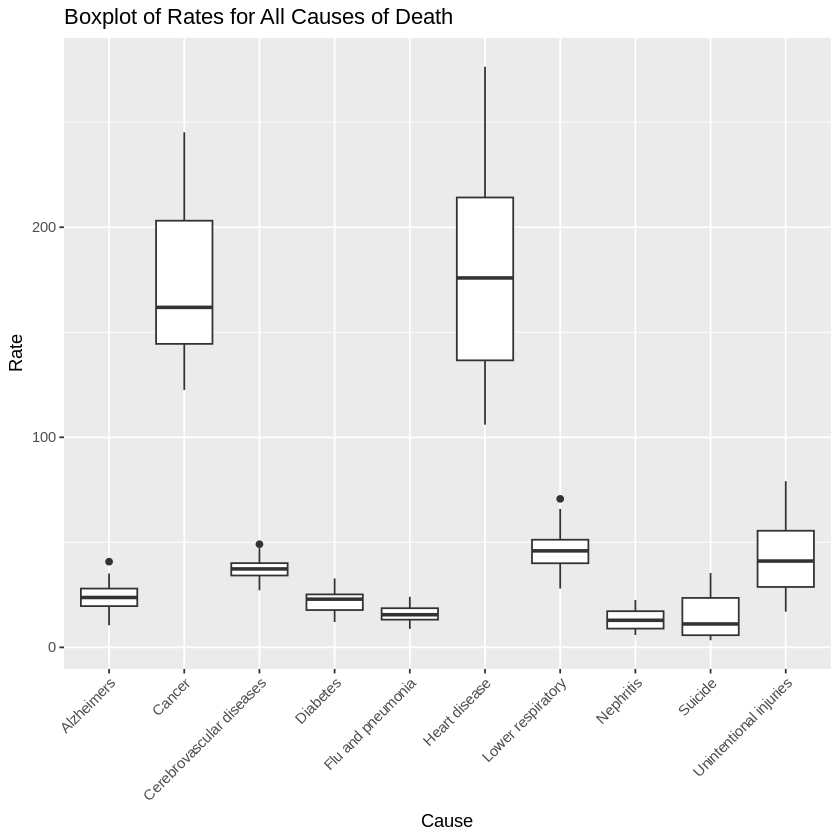

In [13]:
# Create a boxplot for all causes of death in one place
ggplot(df, aes(x = Cause, y = Rate)) +
  geom_boxplot() +
  labs(title = "Boxplot of Rates for All Causes of Death", x = "Cause", y = "Rate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Filtering and Summarizing Female & Male Mortality Rates

In [14]:
#Female
# Get index numbers where Sex is "Female"
female_indices <- which(df$Sex == "Female")
index <- female_indices
# Get the data from the "Rates" column at the specified index
female_indices_value <- df$Rate[index]
summary(female_indices_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.40   14.38   28.15   46.66   43.70  176.80 

In [15]:
#Male
male_indices <- which(df$Sex == "Male")
index <- male_indices
male_indices_value <- df$Rate[index]

summary(male_indices_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.60   20.85   32.65   67.16   63.17  276.40 

### Cause data based on gender

**Heart Disease:**

In [16]:
# Get index numbers where Sex is "Male" and Cause is "Heart disease"
male_heart_disease_indices <- which(df$Sex == "Male" & df$Cause == "Heart disease")
index <- male_heart_disease_indices
# Get the data from the "Rates" column at the specified index
male_heart_disease_value <- df$Rate[index]
summary(male_heart_disease_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  166.5   195.6   215.5   216.6   231.2   276.4 

In [17]:
female_heart_disease_indices <- which(df$Sex == "Female" & df$Cause == "Heart disease")
index <- female_heart_disease_indices
female_heart_disease_value <- df$Rate[index]
summary(female_heart_disease_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  106.0   120.7   135.2   136.8   149.5   176.8 

**Cancer:**

In [18]:
male_Cancer_indices <- which(df$Sex == "Male" & df$Cause == "Cancer")
index <- male_Cancer_indices
male_Cancer_value <- df$Rate[index]
summary(male_Cancer_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  167.0   189.8   203.5   201.4   209.0   245.2 

In [19]:
female_Cancer_indices <- which(df$Sex == "Female" & df$Cause == "Cancer")
index <- female_Cancer_indices
female_Cancer_value <- df$Rate[index]
summary(female_Cancer_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  122.5   138.8   144.2   143.5   150.3   156.7 

**Lower respiratory:**

In [20]:
Male_Lower_respiratory_indices <- which(df$Sex == "Male" & df$Cause == "Lower respiratory")
index <- Male_Lower_respiratory_indices
Male_Lower_respiratory_value <- df$Rate[index]
summary(Male_Lower_respiratory_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   47.95   51.20   52.16   59.45   70.70 

In [21]:
female_Lower_respiratory_indices <- which(df$Sex == "Female" & df$Cause == "Lower respiratory")
index <- female_Lower_respiratory_indices
female_Lower_respiratory_value <- df$Rate[index]
summary(female_Lower_respiratory_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.00   38.08   40.75   41.11   45.38   51.10 

In [ ]:
ggplot(df, aes(x = Cause, y = Rate, fill = Sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Causes of Death Separated by Female and Male", x = "Cause", y = "Rate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink"))

### Region

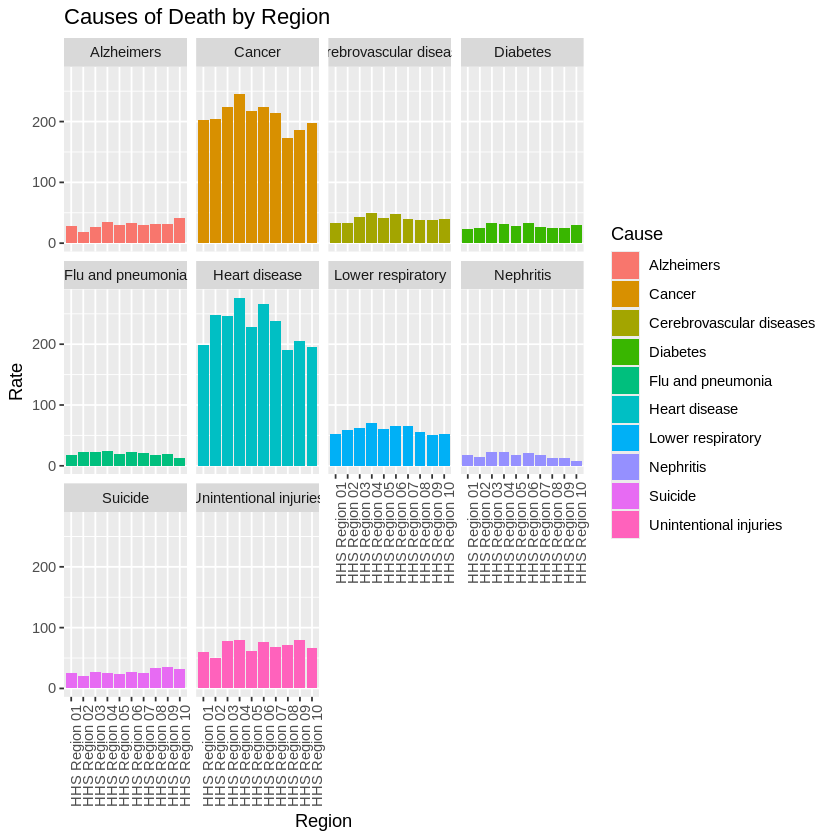

In [22]:
# Faceted plot for causes of death by region
ggplot(df, aes(x = Region, y = Rate, fill = Cause)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ Cause) +
  labs(title = "Causes of Death by Region", x = "Region", y = "Rate") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

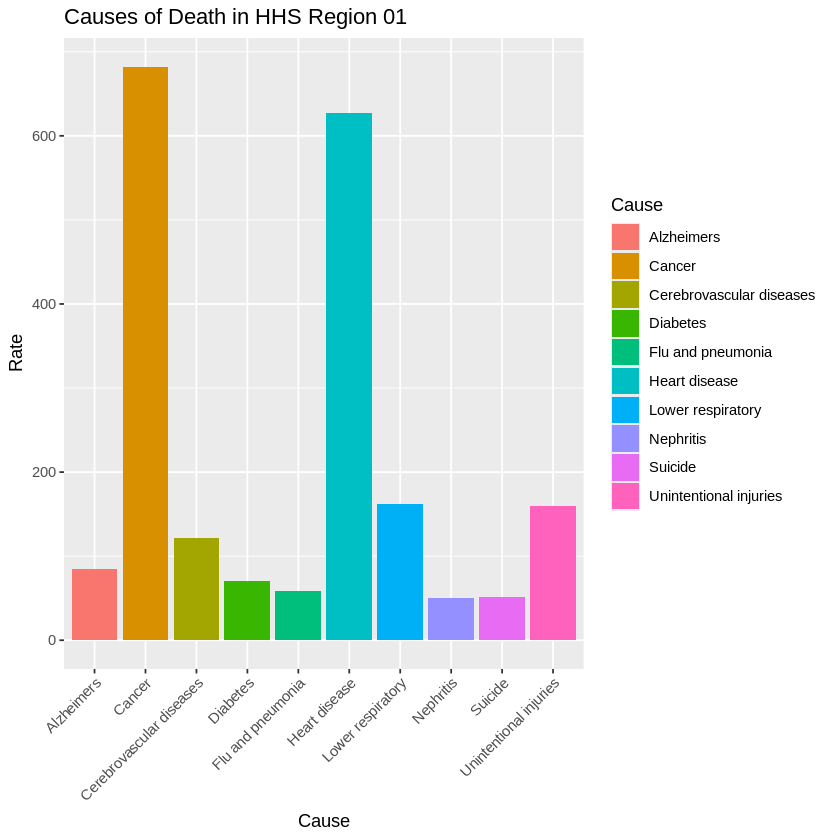

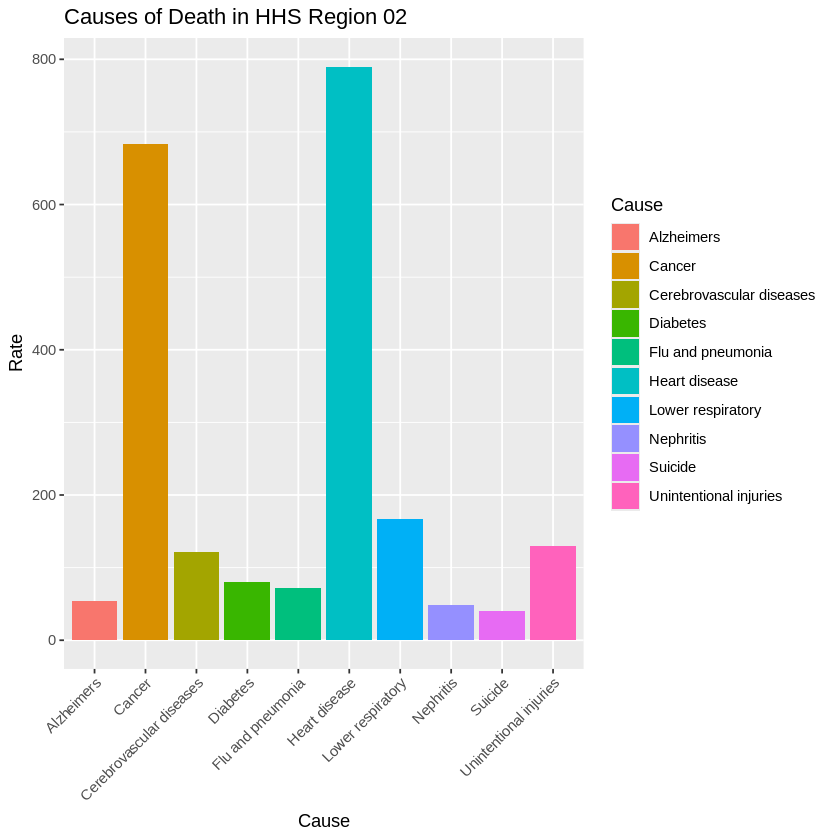

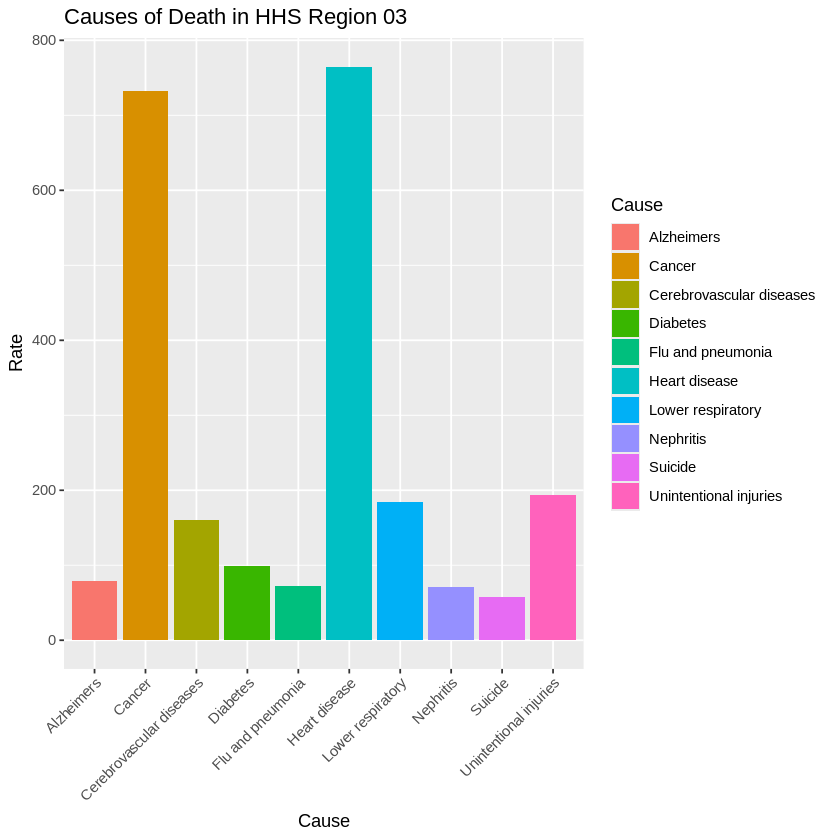

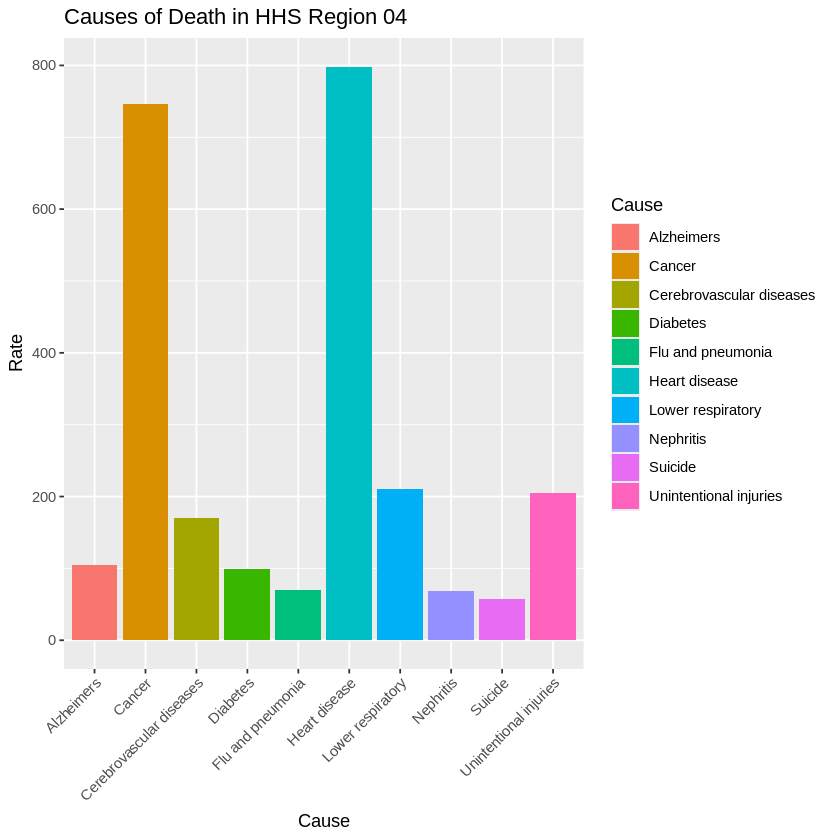

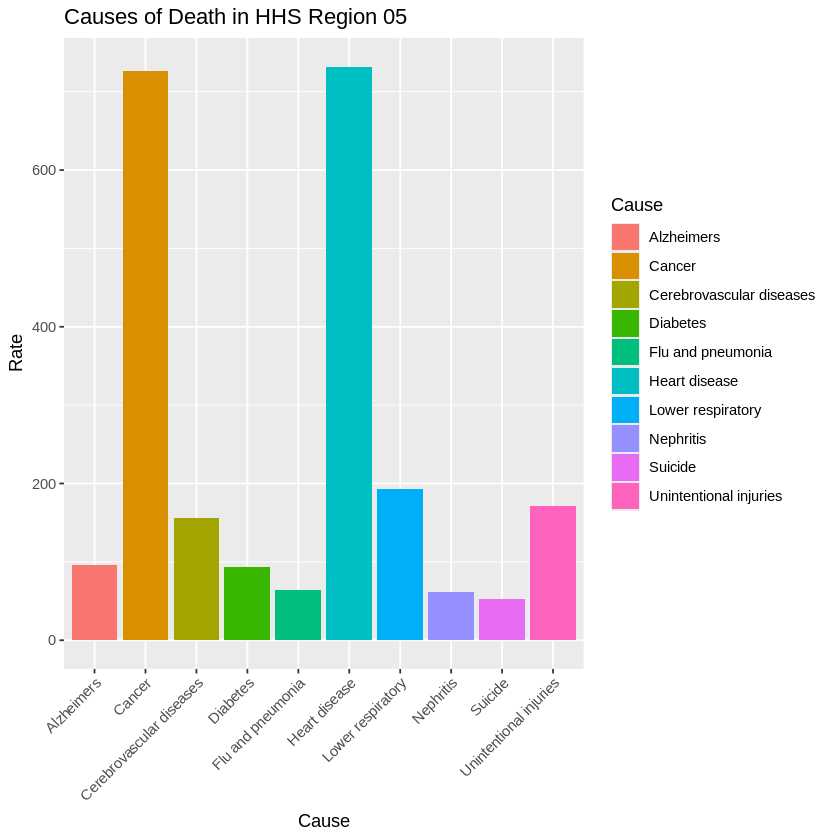

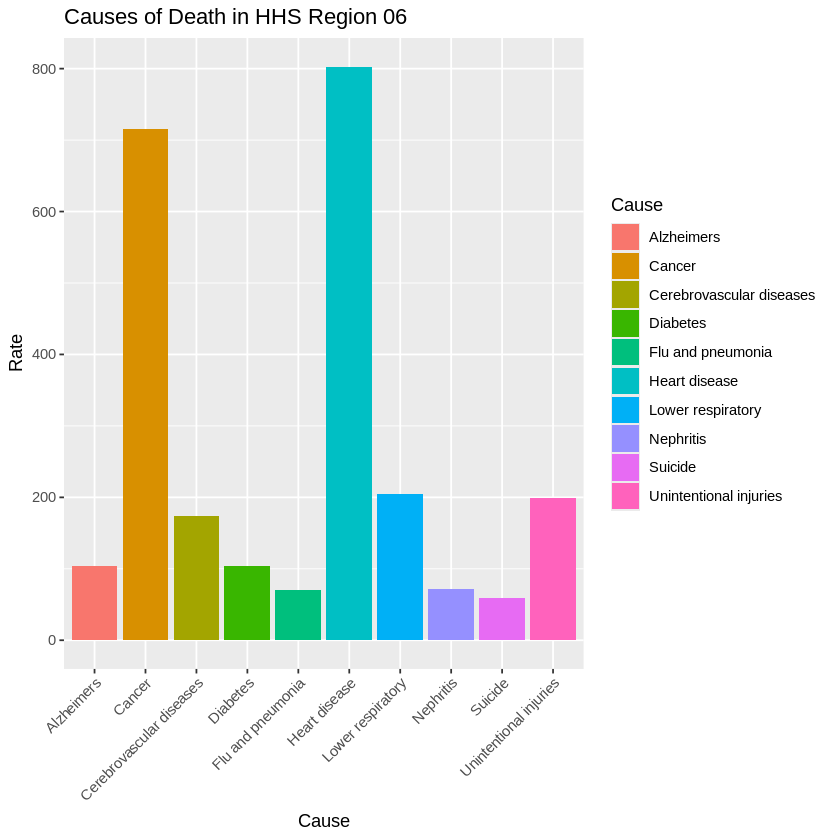

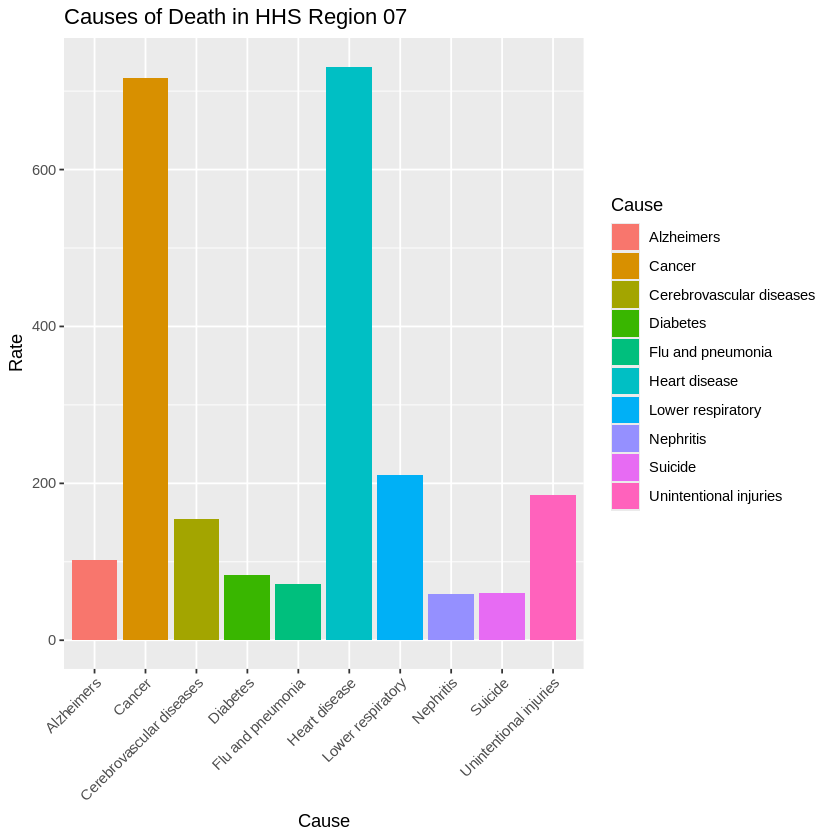

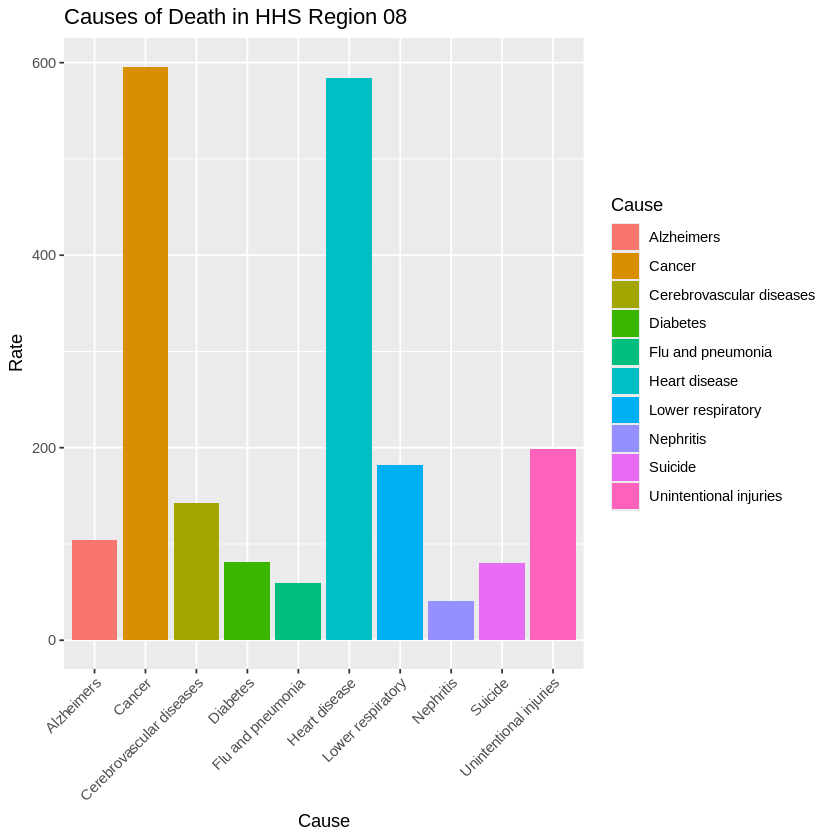

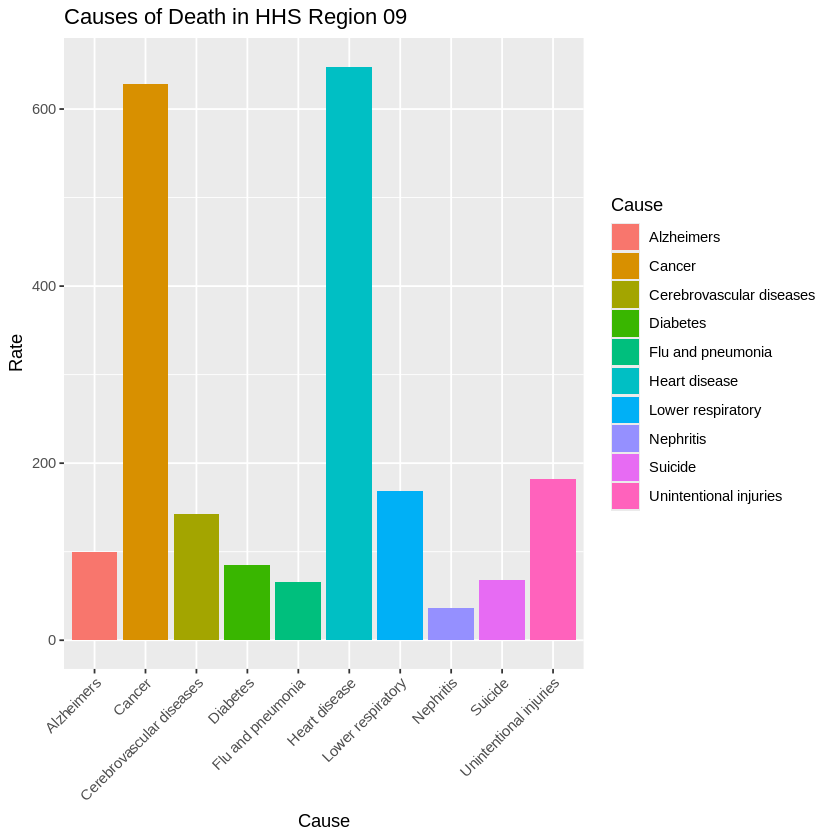

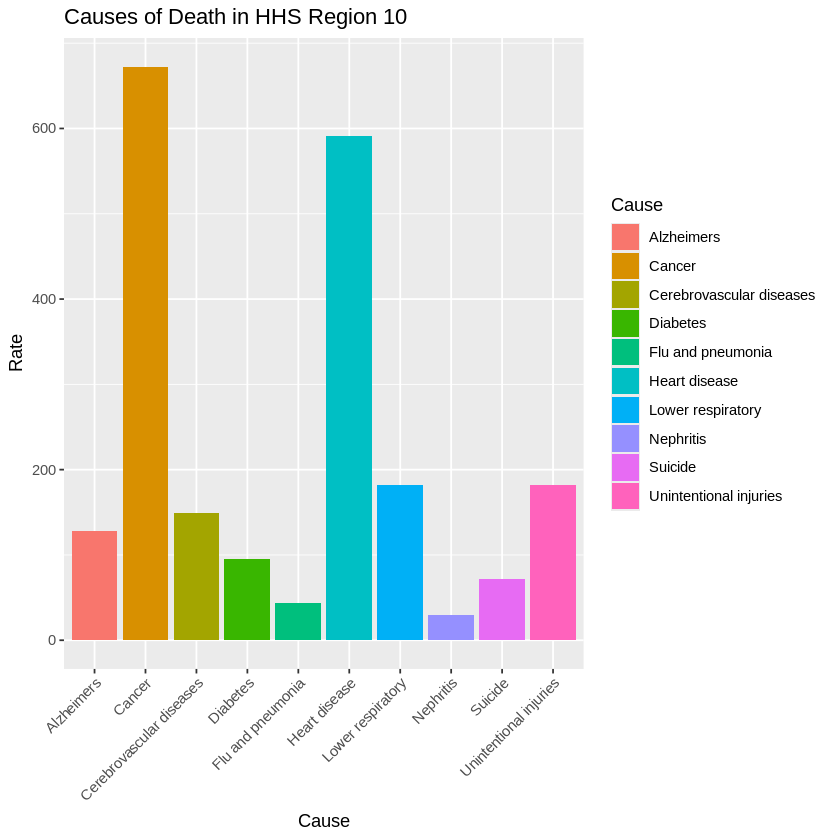

In [23]:
# Function to create plot for a specific region
plot_region <- function(region) {
  region_df <- subset(df, Region == region)
  ggplot(region_df, aes(x = Cause, y = Rate, fill = Cause)) +
    geom_bar(stat = "identity") +
    labs(title = paste("Causes of Death in", region), x = "Cause", y = "Rate") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Plot for HHS Region 01
plot_region("HHS Region 01")

# Plot for HHS Region 02
plot_region("HHS Region 02")

# Plot for HHS Region 03
plot_region("HHS Region 03")

# Plot for HHS Region 04
plot_region("HHS Region 04")

# Plot for HHS Region 05
plot_region("HHS Region 05")

# Plot for HHS Region 06
plot_region("HHS Region 06")

# Plot for HHS Region 07
plot_region("HHS Region 07")

# Plot for HHS Region 08
plot_region("HHS Region 08")

# Plot for HHS Region 09
plot_region("HHS Region 09")

# Plot for HHS Region 10
plot_region("HHS Region 10")

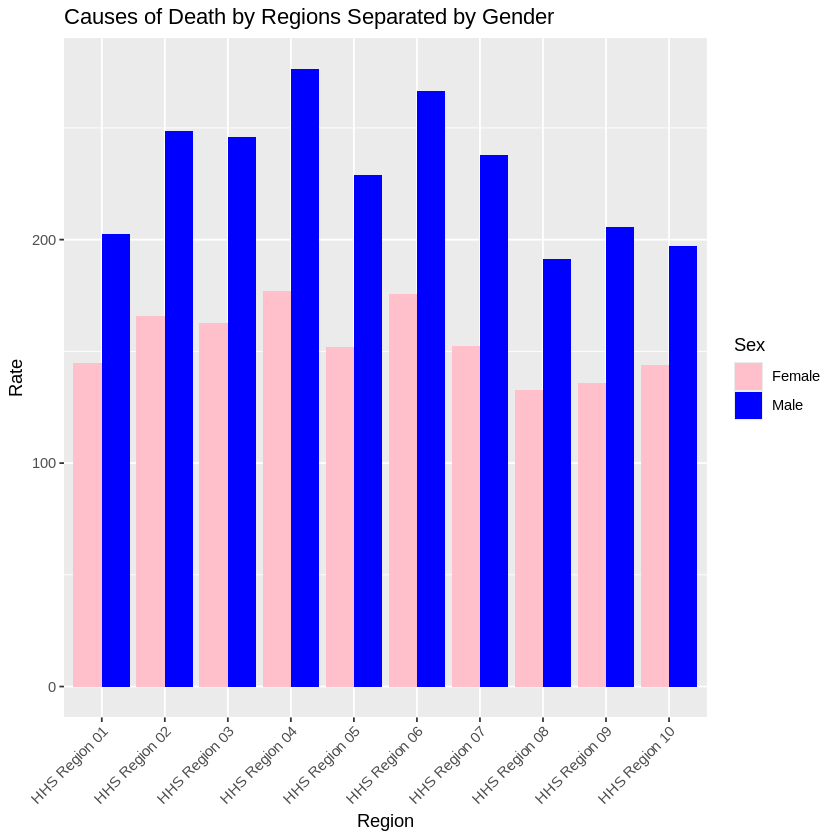

In [24]:
# Plot 1: Bar plot with hue for Sex
ggplot(df, aes(x = Region, y = Rate, fill = Sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Causes of Death by Regions Separated by Gender", x = "Region", y = "Rate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink"))

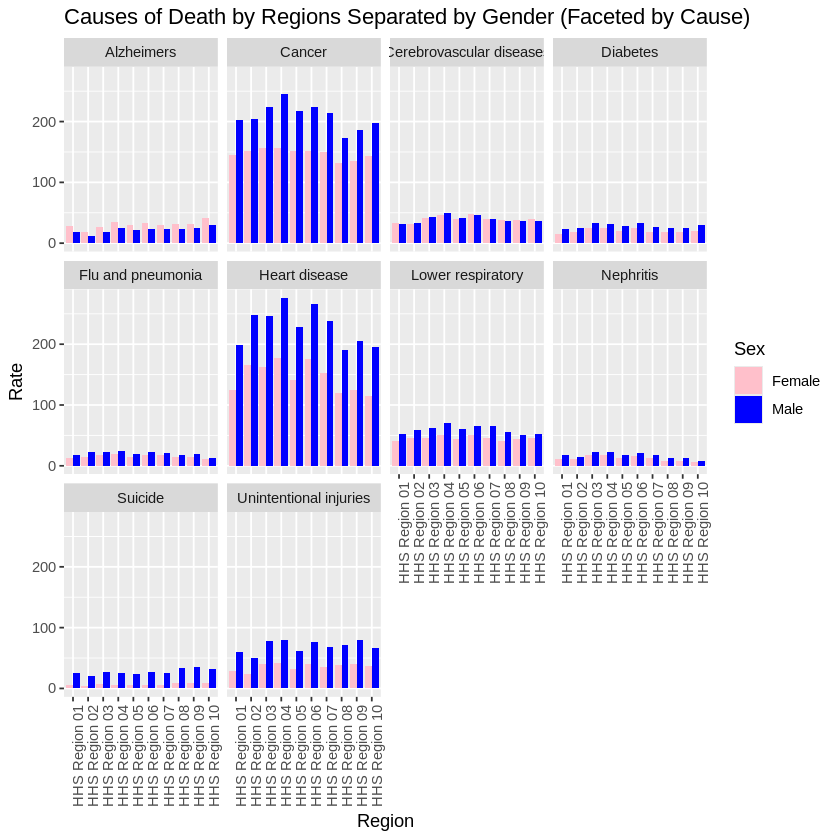

In [25]:
# Plot 2: Faceted bar plot by Cause
ggplot(df, aes(x = Region, y = Rate, fill = Sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ Cause) +
  labs(title = "Causes of Death by Regions Separated by Gender (Faceted by Cause)", x = "Region", y = "Rate") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink"))

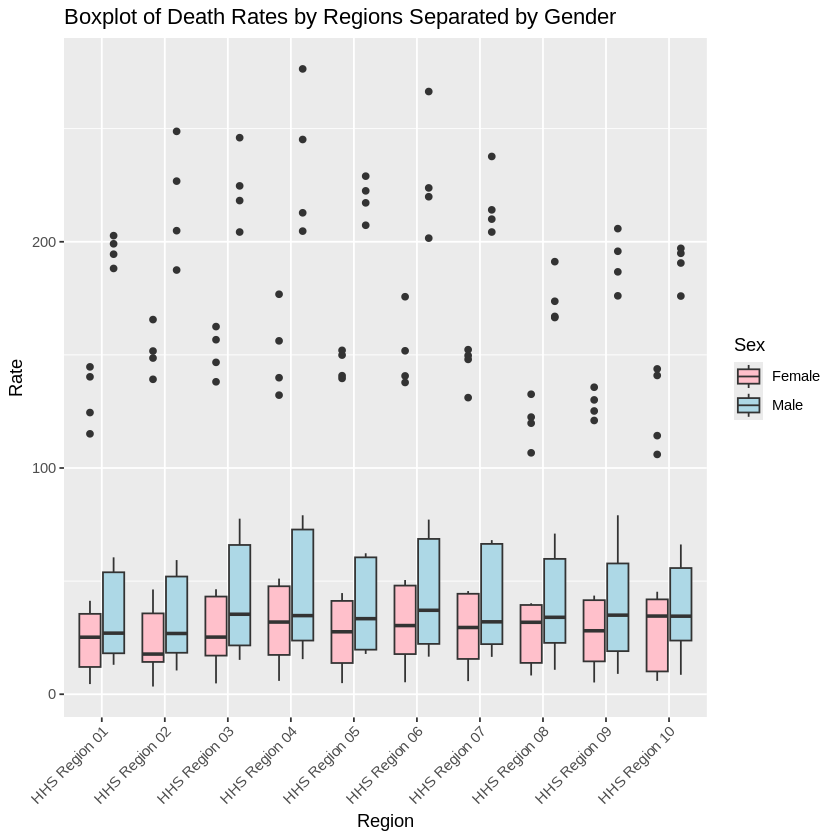

In [26]:
# Plot 3: Box plot with hue for Sex
ggplot(df, aes(x = Region, y = Rate, fill = Sex)) +
  geom_boxplot() +
  labs(title = "Boxplot of Death Rates by Regions Separated by Gender", x = "Region", y = "Rate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("Male" = "light blue", "Female" = "pink"))

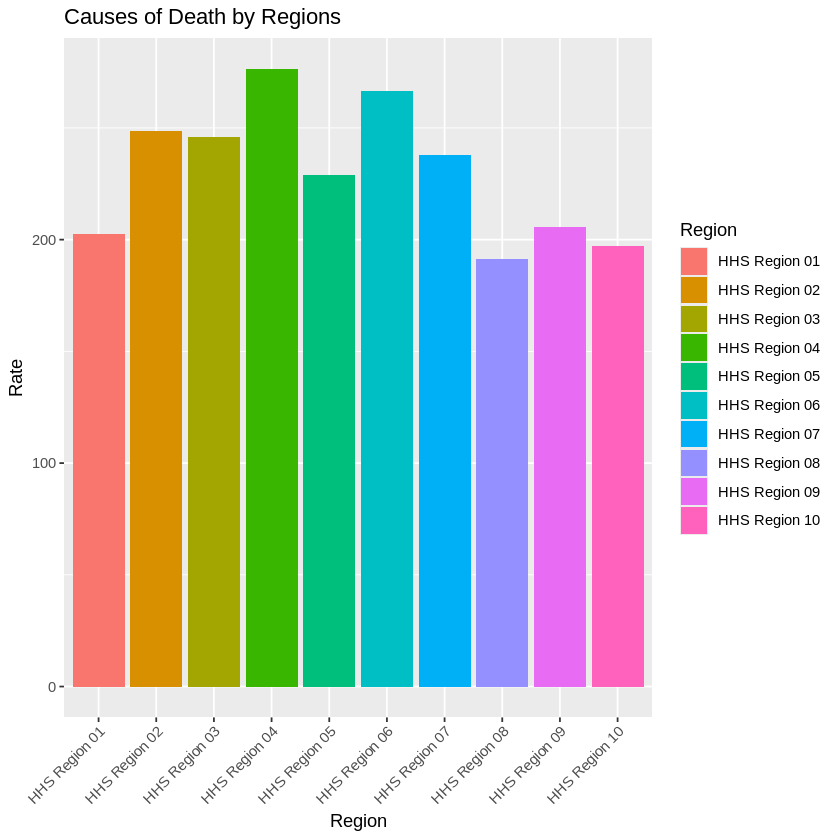

In [27]:
# Plot 4:
ggplot(df, aes(x = Region, y = Rate, fill= Region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Causes of Death by Regions", x = "Region", y = "Rate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))